# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from numpy.random import seed, choice
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from pickle import dump
import numpy as np
from collections import Counter

In [2]:
# Your code here
df = pd.read_csv('../data/raw/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.shape

(768, 9)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df[df['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [6]:
df[df['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [7]:
df[df['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [8]:
#borramos las filas de la masa muscular, la presion arterial y la glucosa a= 0 porque un paciente con
#estos valores, estaría muerto. Así que esto afectaría a nuestro dataframe porque son datos erróneos. 
df.drop(df[df['BMI'] == 0].index, inplace=True)
df.drop(df[df['BloodPressure'] == 0].index, inplace=True)
df.drop(df[df['Glucose'] == 0].index, inplace=True)

In [9]:
df.shape

(724, 9)

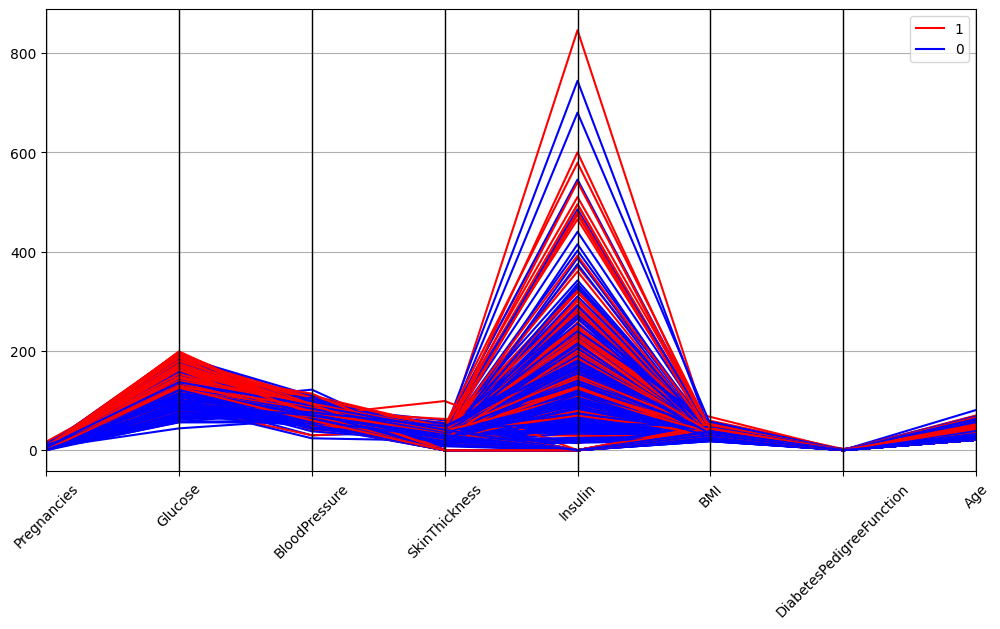

In [10]:
# Visualizamos la relación entre las características de nuestro dataset
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

In [11]:
#hacemos prueba de test y train
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Outcome'],axis=1), df['Outcome'], test_size=0.2, random_state=42)

In [12]:
simple_tree = DecisionTreeClassifier(max_depth=3, max_features=X_train.shape[1]//2, min_samples_leaf=20, min_samples_split=30, random_state=42)
simple_tree.fit(X_train, y_train)

complex_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, random_state=32)
complex_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=32)

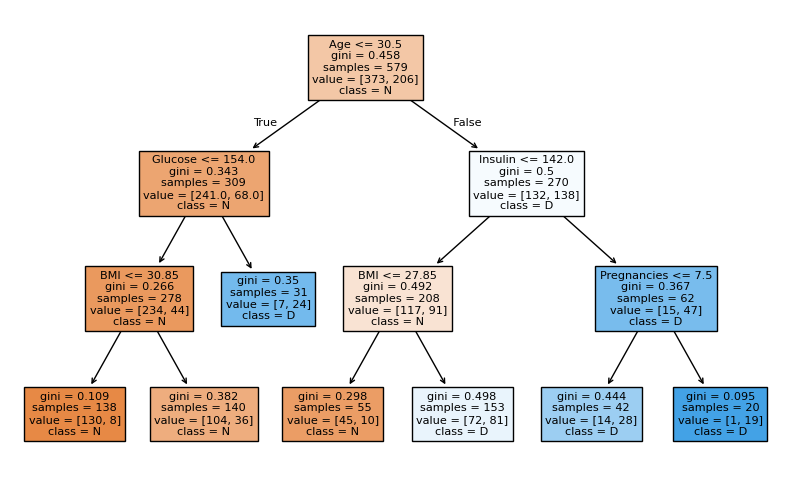

In [13]:
#vemos el arbol simple
plt.figure(figsize=(10, 6))
plot_tree(simple_tree,feature_names=X_train.columns, class_names=['N', 'D'], filled=True)
plt.show()

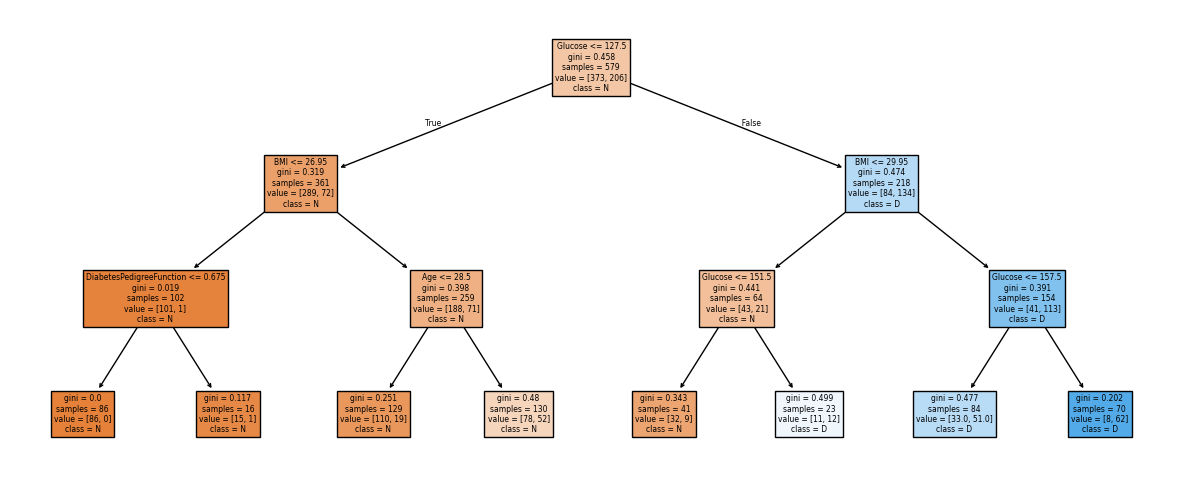

In [14]:
#vemos el arbol complejo
plt.figure(figsize=(15, 6))
plot_tree(complex_tree,feature_names=X_train.columns, class_names=['N', 'D'], filled=True)
plt.show()

In [15]:
X_train[(X_train['Age']> 30.5) & (X_train['Glucose']>= 154)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
154,8,188,78,0,0,47.9,0.137,43
228,4,197,70,39,744,36.7,2.329,31
44,7,159,64,0,0,27.4,0.294,40
361,5,158,70,0,0,29.8,0.207,63
749,6,162,62,0,0,24.3,0.178,50
...,...,...,...,...,...,...,...,...
506,0,180,90,26,90,36.5,0.314,35
489,8,194,80,0,0,26.1,0.551,67
440,0,189,104,25,0,34.3,0.435,41
114,7,160,54,32,175,30.5,0.588,39


In [16]:
#caluclamos las metricas de entrenamiento y test y también sus diferencias 
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # creamos un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [17]:
#evaluamos el modelo simple y complejo en entrenamiento y prueba
train_pred_complex = complex_tree.predict(X_train)
test_pred_complex = complex_tree.predict(X_test)
train_pred_simple = simple_tree.predict(X_train)
test_pred_simple = simple_tree.predict(X_test)

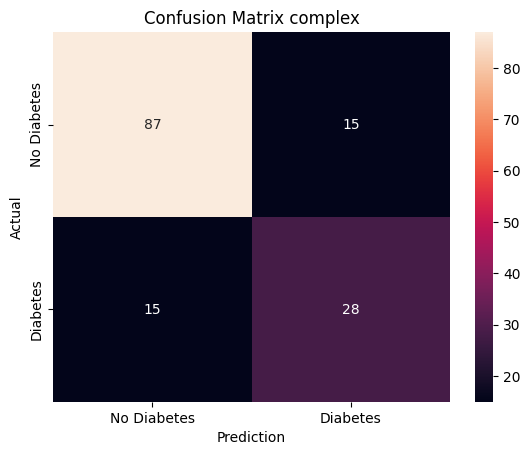

In [18]:
#MATRIZ DE CONFUSION DEL ARBOL COMPLEJO
cm = confusion_matrix(y_test, test_pred_complex)
sns.heatmap(cm,
            annot=True, 
            fmt='g',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual')
plt.title('Confusion Matrix complex')
plt.xlabel('Prediction')
plt.show()

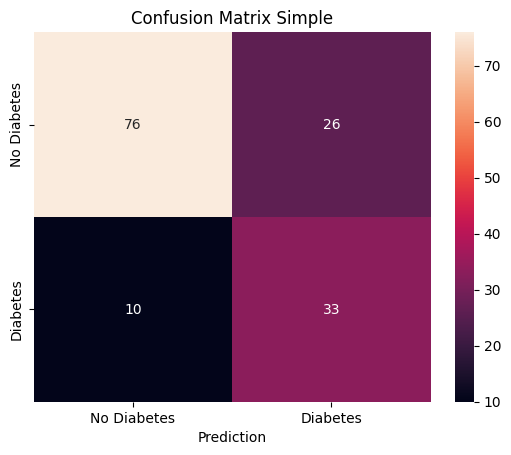

In [72]:
cm = confusion_matrix(y_test, test_pred_simple)
sns.heatmap(cm,
            annot=True, 
            fmt='g',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix Simple')
plt.xlabel('Prediction')
plt.show()

In [20]:
#metricas del complejo
get_metrics(y_train, y_test, train_pred_complex, test_pred_complex)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.770294,0.652742,0.733693,0.706215,0.606796,0.860590
Test,0.793103,0.651163,0.752052,0.651163,0.651163,0.852941
Diferencia,-0.022810,0.001579,-0.018359,0.055052,-0.044367,0.007649


In [21]:
#metricas del simple
get_metrics(y_train, y_test, train_pred_simple, test_pred_simple)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.744387,0.672566,0.742927,0.617886,0.737864,0.747989
Test,0.751724,0.647059,0.756270,0.559322,0.767442,0.745098
Diferencia,-0.007337,0.025508,-0.013343,0.058564,-0.029578,0.002891


Nos quedamos con el modelo comlejo porque tiene mayor accuracy, AUC, precision y specifity.
Aunque el modelo simple tiene mejor recall, es mejor tener mayor precisión porque minimiza los
falsos positivos.

In [22]:
# DEFINIMOS HIPERPARÁMETROS PARA EL MODELO OPTIMIZADO
tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

In [23]:
# Creamos un objeto GridSearchCV para encontrar la mejor combinación de hiperparámetros y lo ajustamos al modelo entrenamiento
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='f1', verbose=1)

In [24]:
# Imprimimos los mejores parámetros encontrados por GridSearchCV
print("Mejores parámetros:", grid_search.best_params_)
best_tree = grid_search.best_estimator_

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 2}


In [25]:
# Usamos el mejor modelo encontrado para predecir sobre el conjunto de entrenamiento, test y hacemos lasmetricas
train_pred_best = best_tree.predict(X_train)
test_pred_best = best_tree.predict(X_test)
get_metrics(y_train, y_test, train_pred_best, test_pred_best)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.804836,0.698667,0.767023,0.775148,0.635922,0.898123
Test,0.827586,0.691358,0.776562,0.736842,0.651163,0.901961
Diferencia,-0.022750,0.007309,-0.009539,0.038306,-0.015240,-0.003837


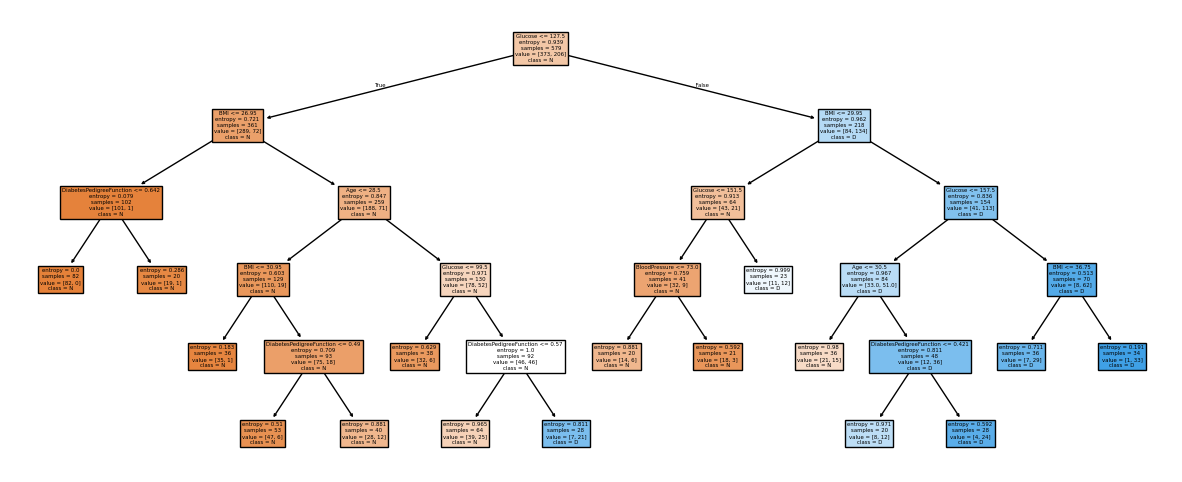

In [26]:
# Visualizamos el árbol de decisión optimizado
plt.figure(figsize=(15, 6))
plot_tree(best_tree, feature_names=X_train.columns, class_names=['N', 'D'], filled=True)
plt.show()

In [27]:
#hacemos las metricas para comparar los árboles
def comparar_modelos(y_train, y_test, pred_train_simple, pred_test_simple,
                     pred_train_complex, pred_test_complex,
                     pred_train_opt, pred_test_opt):
    
    modelos = ['Simple', 'Complejo', 'Optimizado']
    metricas = []

    for y_pred_train, y_pred_test in [
        (pred_train_simple, pred_test_simple),
        (pred_train_complex, pred_test_complex),
        (pred_train_opt, pred_test_opt)
    ]:
        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        f1 = f1_score(y_test, y_pred_test)
        auc = roc_auc_score(y_test, y_pred_test)
        precision = precision_score(y_test, y_pred_test)
        recall = recall_score(y_test, y_pred_test)
        specificity = confusion_matrix(y_test, y_pred_test)[0,0] / sum(confusion_matrix(y_test, y_pred_test)[0])
        
        metricas.append([
            train_accuracy,
            test_accuracy,
            f1,
            auc,
            precision,
            recall,
            specificity
        ])
    
    df_comparativa = pd.DataFrame(metricas, columns=[
        'Accuracy (Train)', 'Accuracy (Test)', 'F1 Score', 'AUC',
        'Precision', 'Recall', 'Specificity'
    ], index=modelos)
    
    return df_comparativa.round(4)

In [28]:
#hacemos la comparación
df_comparativa = comparar_modelos(
    y_train, y_test,
    train_pred_simple, test_pred_simple,
    train_pred_complex, test_pred_complex,
    train_pred_best, test_pred_best
)
print(df_comparativa)

            Accuracy (Train)  Accuracy (Test)  F1 Score     AUC  Precision  \
Simple                0.7444           0.7517    0.6471  0.7563     0.5593   
Complejo              0.7703           0.7931    0.6512  0.7521     0.6512   
Optimizado            0.8048           0.8276    0.6914  0.7766     0.7368   

            Recall  Specificity  
Simple      0.7674       0.7451  
Complejo    0.6512       0.8529  
Optimizado  0.6512       0.9020  


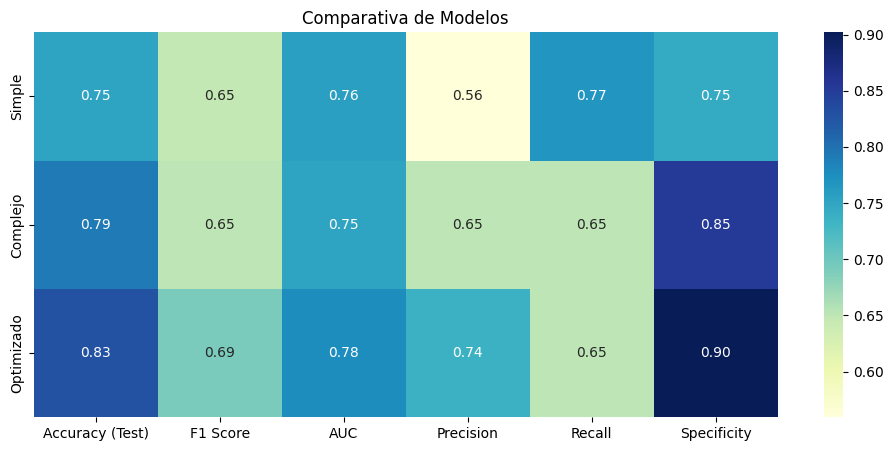

In [29]:
#la comparacion en mapa de calor
plt.figure(figsize=(12, 5))
sns.heatmap(df_comparativa.iloc[:,1:], annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Comparativa de Modelos")
plt.show()

El modelo optimizado tiene mejor rendimiento en todo menos en el recall, en comparación con los modelos simples y complejos. El modelo optimizado es el mejor para predecir correctamento los casos de diabetes

# RANDOM FOREST

In [30]:
modelrandom = RandomForestClassifier(random_state= 42)
modelrandom.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
class RandomForestBootstrap: 
    def __init__(self, n_estimators, random_state, max_depth, min_samples_leaf, max_features, X, y):
        self.n_estimators= n_estimators #árboles que se van a generar
        self.random_state = random_state #semillas para asegurar reproducibilidad
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.X = X
        self.y = y
        self.estimators = [] #lista donde se guardan los modelos
    
    #aqui hacemos la selección aleatoria de las filas que entrenará cada árbol
    def get_bootstrap_datasets(self):
        seed(self.random_state)
        #fija la semilla para que el muestreo aleatorio sea reproducible
        idxs = [choice(len(self.X), len(self.X), replace=True) for _ in range(self.n_estimators)]
        #creamos un lista de índices de filas seleccionadas con reemplazo
        feature_idxs = [choice(self.X.shape[1], self.max_features, replace=False) for _ in range(self.n_estimators)]
        datasets = [
            (self.X.iloc[idxs[i], feature_idxs[i]], self.y.iloc[idxs[i]])
            for i in range(self.n_estimators)
        ]
        #para cada estimador, elegimos columnas sin reemplazo
        return feature_idxs, datasets
    
    def fit(self):
        feature_idxs, data_sets = self.get_bootstrap_datasets()
        #iteramos sobre los datasets y extraemos los datos X, y
        # i sirve para saber qué conjunto usar 
        #data contiene X_bootstrap e y_bootstrap
        for i, data in enumerate(data_sets):
            X, y = data
            #entrenamos el decissiontreeclasifier de X, y con los hiperparametros
            arbol = DecisionTreeClassifier(max_depth=self.max_depth, min_samples_leaf=self.min_samples_leaf, max_features=self.max_features, random_state=self.random_state).fit(X, y)
            #entrenamos un árbol de decisión con los parámetros y los datos bootstrap
            self.estimators.append((feature_idxs[i], arbol))
    #realizamos predicciones sobre un nuevo conjunto de datos combinando las predicciones de todos los árboles.
    def predict(self, X):
        predictions = np.vstack([arbol.predict(X.iloc[:, idxs]) for idxs, arbol in self.estimators])
        predicciones = [Counter(predictions[:, i]).most_common(1)[0][0] for i in range(predictions.shape[1])]
        return predicciones

In [32]:
#creamos y entrenamos los modelos simples y complejos 
rf_simple = RandomForestBootstrap(n_estimators=3, random_state=42, max_depth=33, min_samples_leaf=30, max_features= X_train.shape[1]//2, X=X_train, y=y_train)
rf_simple.fit()
rf_complex = RandomForestBootstrap(n_estimators=100, max_depth=20, min_samples_leaf=1, max_features=int(X_train.shape[1]*0.8), random_state=42, X=X_train, y=y_train)
rf_complex.fit()

In [33]:
#HACEMOS LAS PREDICCIONES DE XTRAIN Y X TEST DEL SIMPLE Y EL COMPLEJO
rf_train_pred_simple = rf_simple.predict(X_train)
rf_test_pred_simple = rf_simple.predict(X_test)
rf_train_pred_complex = rf_complex.predict(X_train)
rf_test_pred_complex = rf_complex.predict(X_test)

In [34]:
get_metrics(y_train, y_test, rf_train_pred_simple, rf_test_pred_simple)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.737478,0.589189,0.690837,0.664634,0.529126,0.852547
Test,0.703448,0.455696,0.621067,0.500000,0.418605,0.823529
Diferencia,0.034030,0.133493,0.069770,0.164634,0.110522,0.029018


In [35]:
get_metrics(y_train, y_test, rf_train_pred_complex, rf_test_pred_complex)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Test,0.793103,0.651163,0.752052,0.651163,0.651163,0.852941
Diferencia,0.206897,0.348837,0.247948,0.348837,0.348837,0.147059


In [36]:
#buscamos los mejores hiperparámetros
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', 0.5]
}
# Crear el modelo y la búsqueda
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print("Mejores parámetros:", grid_search_rf.best_params_)

Mejores parámetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 100}


In [37]:
# Modelo con los mejores parámetros
best_rf = RandomForestClassifier(
    max_depth=10,
    max_features='sqrt',  
    min_samples_leaf=5,   
    n_estimators=100, 
    random_state=42
)
# Entrenamiento
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [38]:
# Predicciones
y_train_pred_best = best_rf.predict(X_train)
y_test_pred_best = best_rf.predict(X_test)
metrics_best = get_metrics(y_train, y_test, y_train_pred_best, y_test_pred_best)
metrics_best

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.903282,0.857868,0.884725,0.898936,0.820388,0.949062
Test,0.793103,0.651163,0.752052,0.651163,0.651163,0.852941
Diferencia,0.110178,0.206705,0.132673,0.247773,0.169226,0.096120


In [39]:
#DEFINIMOS  VARIABLES PARA COMPARAR LOS TRES MODELOS
def comparar_rf_modelos(y_train, y_test,
                        rf_train_pred_simple, rf_test_pred_simple,
                        rf_train_pred_complex, rf_test_pred_complex,
                        rf_train_pred_best, rf_test_pred_best):
    
    modelos = ['RF Simple', 'RF Complejo', 'RF Optimizado']
    metricas = []

    for y_pred_train, y_pred_test in [
        (rf_train_pred_simple, rf_test_pred_simple),
        (rf_train_pred_complex, rf_test_pred_complex),
        (rf_train_pred_best, rf_test_pred_best)
    ]:
        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        f1 = f1_score(y_test, y_pred_test)
        auc = roc_auc_score(y_test, y_pred_test)
        precision = precision_score(y_test, y_pred_test)
        recall = recall_score(y_test, y_pred_test)
        specificity = confusion_matrix(y_test, y_pred_test)[0, 0] / sum(confusion_matrix(y_test, y_pred_test)[0])
        
        metricas.append([
            train_accuracy,
            test_accuracy,
            f1,
            auc,
            precision,
            recall,
            specificity
        ])
    
    df_comparativa = pd.DataFrame(metricas, columns=[
        'Accuracy (Train)', 'Accuracy (Test)', 'F1 Score', 'AUC',
        'Precision', 'Recall', 'Specificity'
    ], index=modelos)
    
    return df_comparativa.round(4)

In [40]:
#COMPARAMOS LOS TRES MODELOS 
comparar_rf_modelos(
    y_train, y_test,
    rf_train_pred_simple, rf_test_pred_simple,
    rf_train_pred_complex, rf_test_pred_complex,
    y_train_pred_best, y_test_pred_best
)

,Accuracy (Train),Accuracy (Test),F1 Score,AUC,Precision,Recall,Specificity
RF Simple,0.7375,0.7034,0.4557,0.6211,0.5000,0.4186,0.8235
RF Complejo,1.0000,0.7931,0.6512,0.7521,0.6512,0.6512,0.8529
RF Optimizado,0.9033,0.7931,0.6512,0.7521,0.6512,0.6512,0.8529


In [41]:
#observamos las importancias
importances = best_rf.feature_importances_
features = X_train.columns
feature_importances = {feat: imp for feat, imp in zip(features, importances)}
feature_importances = dict(sorted(feature_importances.items(), key=lambda x: x[1], reverse=True))
feature_importances

{'Glucose': np.float64(0.34363109713572504),
 'BMI': np.float64(0.1735541971461352),
 'Age': np.float64(0.13395730314192417),
 'DiabetesPedigreeFunction': np.float64(0.09188445567207817),
 'Pregnancies': np.float64(0.07209596382059748),
 'Insulin': np.float64(0.06958695082837872),
 'BloodPressure': np.float64(0.05848206573975374),
 'SkinThickness': np.float64(0.0568079665154076)}

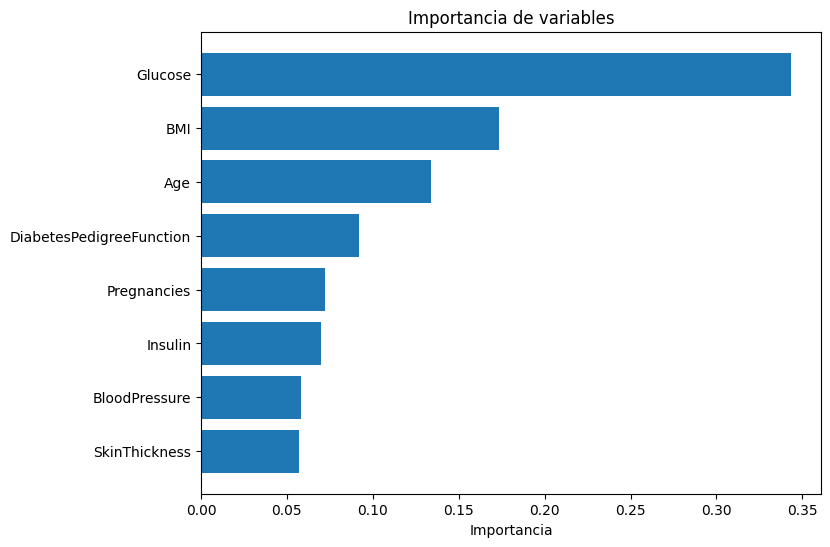

In [42]:
#graficamos las importancias 
plt.figure(figsize=(8,6))
plt.barh(list(feature_importances.keys()), list(feature_importances.values()))
plt.gca().invert_yaxis()
plt.xlabel('Importancia')
plt.title('Importancia de variables')
plt.show()

El RF Simple es el que tiene los valores mas bajos. El complejo y el optimizado en un principio se parecen mucho pero el optimizado tiene menor overfitting y eso indica mejor equilibirio.

La glucosa es la variable mas importante con diferencia, y la BMI y la edad también hay que considerarlas de gran importancia. 

# BOOSTING DE ALGORITMOS

In [ ]:
#implementamos el modelo Boosting
class CustomBoosting:
  #definiimos sus parámetros
  def __init__(self, n_estimators=100, learning_rate=0.01, max_depth=10, min_samples_leaf=10, max_features=1.0, random_state=42):
    self.n_estimators = n_estimators 
    self.learning_rate = learning_rate  
    self.max_depth = max_depth
    self.min_samples_leaf = min_samples_leaf 
    self.max_features = max_features 
    self.random_state = random_state  
    self.estimadores = []
    #añadimos esta funcion para calcular las variables importantes  
    self.feature_importances_ = None
  def muestreo(self, X, y, pesos):
      # mostramos ejemplos del df con probabilidades proporcionales a pesos
      np.random.seed(self.random_state)
      indices = np.random.choice(len(X), len(X), p=pesos)
      return X.iloc[indices], y.iloc[indices]

  def get_error(self, y, y_pred, pesos):
      #calculo de error ponderado calcula predicciones equivocadas y su error
      instancias_erroneas = (y_pred != y)  
      pesos_instancias_erroneas = pesos[instancias_erroneas] 
      suma_peso_error = np.sum(pesos_instancias_erroneas)  
      error_ponderado = suma_peso_error / np.sum(pesos)
      return instancias_erroneas, error_ponderado

  def get_estimator_importance(self, error_ponderado):
      #calcula la importancia que tendrá un estimador según su error.
      ratio_acierto_error = (1 - error_ponderado) / error_ponderado 
      ratio_log = np.log(ratio_acierto_error) 
      estimador_imp = self.learning_rate * ratio_log  
      return estimador_imp

  def update_weights(self, estimador_imp, instancias_erroneas, pesos):
      #actualiza los pesos de las instancias para las iteracciones
      actualizacion_pesos = np.where(instancias_erroneas, np.exp(estimador_imp), np.exp(-estimador_imp))
      pesos = pesos * actualizacion_pesos  
      pesos = pesos / np.sum(pesos) 
      return pesos

  def fit(self, X, y):
    #entrenamiento del modelo
    pesos = np.ones(len(X)) / len(X)
    self.feature_importances_ = np.zeros(X.shape[1])
    for _ in range(self.n_estimators):
      X_sampled, y_sampled = self.muestreo(X, y, pesos)
      estimador = DecisionTreeClassifier(max_depth=self.max_depth, min_samples_leaf=self.min_samples_leaf, max_features=self.max_features).fit(X_sampled, y_sampled)
      y_pred = estimador.predict(X)
      instancias_erroneas, error_ponderado = self.get_error(y, y_pred, pesos)
      estimador_imp = self.get_estimator_importance(error_ponderado)
      self.estimadores.append((estimador, estimador_imp))
      self.feature_importances_ += estimador_imp * estimador.feature_importances_
      pesos = self.update_weights(estimador_imp, instancias_erroneas, pesos)
    self.feature_importances_ /= np.sum(self.feature_importances_)

  def predict(self, X):
    #prediccion con el conjunto de estimadores
    final_predictions = np.zeros(X.shape[0])
    for estimador, estimador_imp in self.estimadores:
        predictions = estimador.predict(X)
        preds_ponderadas = estimador_imp * predictions
        final_predictions = final_predictions + preds_ponderadas
    mean_val = np.mean(final_predictions)
    yhats = np.where(final_predictions<mean_val,0,1)
    return yhats

In [56]:
#cAMBIAMOS HIPERPARÁMETROS Y LOS COMPARAMOS UNOS CON OTROS
learning_rates = [0.01, 0.05, 0.1]
max_depths = [3, 5, 10]
n_estimators = 50
resultados = []
for lr in learning_rates:
    for depth in max_depths:
        clf = CustomBoosting(
            n_estimators=n_estimators,
            learning_rate=lr,
            max_depth=depth,
            min_samples_leaf=10,
            max_features=1.0,
            random_state=42
        )
        
        clf.fit(X_train, y_train)
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        f1 = f1_score(y_test, y_test_pred)
        auc = roc_auc_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred)
        recall = recall_score(y_test, y_test_pred)
        specificity = confusion_matrix(y_test, y_test_pred)[0,0] / sum(confusion_matrix(y_test, y_test_pred)[0])

        resultados.append({
            'Modelo': f'Boosting (d={depth}, lr={lr})',
            'Accuracy (Train)': train_acc,
            'Accuracy (Test)': test_acc,
            'F1': f1,
            'AUC': auc,
            'Precision': precision,
            'Recall': recall,
            'Specificity': specificity
        })

# Mostrar resultados en DataFrame
df_boosting_results = pd.DataFrame(resultados)
df_boosting_results = df_boosting_results.round(4)
print(df_boosting_results)

                     Modelo  Accuracy (Train)  Accuracy (Test)      F1  \
0   Boosting (d=3, lr=0.01)            0.7772           0.7724  0.6796   
1   Boosting (d=5, lr=0.01)            0.8169           0.8069  0.7308   
2  Boosting (d=10, lr=0.01)            0.8601           0.7862  0.6990   
3   Boosting (d=3, lr=0.05)            0.8014           0.7655  0.6731   
4   Boosting (d=5, lr=0.05)            0.8359           0.7724  0.6972   
5  Boosting (d=10, lr=0.05)            0.9344           0.7241  0.6364   
6    Boosting (d=3, lr=0.1)            0.7841           0.7310  0.6667   
7    Boosting (d=5, lr=0.1)            0.8549           0.7379  0.6481   
8   Boosting (d=10, lr=0.1)            0.9775           0.7034  0.6261   

      AUC  Precision  Recall  Specificity  
0  0.7844     0.5833  0.8140       0.7549  
1  0.8291     0.6230  0.8837       0.7745  
2  0.8010     0.6000  0.8372       0.7647  
3  0.7795     0.5738  0.8140       0.7451  
4  0.8046     0.5758  0.8837       0.72

In [57]:
#Nos quedamos con el Boosting ID=1 : Boosting (d=5, lr=0.01) porque todos
#sus valores son los más altos. 
best_boost = CustomBoosting(n_estimators=100, max_depth=5, learning_rate=0.01, random_state=42)
best_boost.fit(X_train, y_train)

In [58]:
# Realizamos predicciones en el conjunto de entrenamiento y prueba
test_pred_best_boost = best_boost.predict(X_test)
train_pred_best_boost = best_boost.predict(X_train)

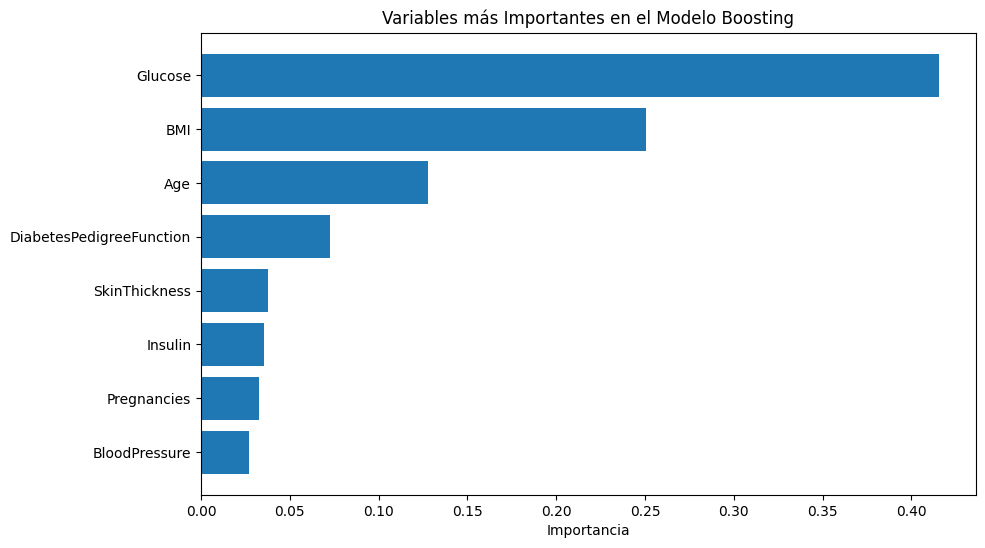

In [63]:
#importancias de las variables en el boosting
importancias = best_boost.feature_importances_
df_importancias = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': importancias
}).sort_values('Importancia', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(df_importancias['Variable'], df_importancias['Importancia'])
plt.xlabel('Importancia')
plt.title('Variables más Importantes en el Modelo Boosting')
plt.gca().invert_yaxis()  
plt.show()

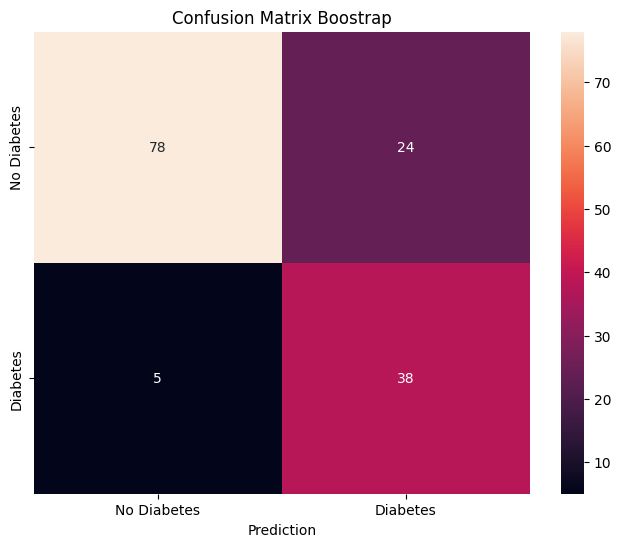

In [71]:
#matriz de confusión
cm_boost = confusion_matrix(y_test, test_pred_best_boost)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_boost,  
            annot=True, 
            fmt='g',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix Boostrap')
plt.xlabel('Prediction')
plt.show()

In [ ]:
#COMPARAMOS TODOS LOS MODELOS DE TODO EL PROYECTO: DECISIÓN, RANDOM FOREST Y BOOSTING
def comparar_todos_los_modelos(y_train, y_test, predicciones_dict):
    resultados = []
    nombres = []
    for nombre, (y_pred_train, y_pred_test) in predicciones_dict.items():
        train_acc = accuracy_score(y_train, y_pred_train)
        test_acc = accuracy_score(y_test, y_pred_test)
        f1 = f1_score(y_test, y_pred_test)
        auc = roc_auc_score(y_test, y_pred_test)
        prec = precision_score(y_test, y_pred_test)
        recall = recall_score(y_test, y_pred_test)
        specificity = confusion_matrix(y_test, y_pred_test)[0, 0] / sum(confusion_matrix(y_test, y_pred_test)[0])
        resultados.append([train_acc, test_acc, f1, auc, prec, recall, specificity])
        nombres.append(nombre)
    df_resultados = pd.DataFrame(resultados, columns=[
        'Accuracy (Train)', 'Accuracy (Test)', 'F1 Score', 'AUC',
        'Precision', 'Recall', 'Specificity'
    ], index=nombres)
    return df_resultados.round(4)

In [60]:
#DEFINIMOS TODAS LAS PREDICCCIONES PARA HACER LA TABLA 
predicciones_dict = {
    'Árbol Simple': (train_pred_simple, test_pred_simple),
    'Árbol Complejo': (train_pred_complex, test_pred_complex),
    'Árbol Optimizado': (train_pred_best, test_pred_best),
    'RF Simple': (rf_train_pred_simple, rf_test_pred_simple),
    'RF Complejo': (rf_train_pred_complex, rf_test_pred_complex),
    'RF Optimizado': (y_train_pred_best, y_test_pred_best),
    'Boosting (d=5, lr=0.01)': (train_pred_best_boost, test_pred_best_boost)
}
df_todos = comparar_todos_los_modelos(y_train, y_test, predicciones_dict)
print(df_todos)

                         Accuracy (Train)  Accuracy (Test)  F1 Score     AUC  \
Árbol Simple                       0.7444           0.7517    0.6471  0.7563   
Árbol Complejo                     0.7703           0.7931    0.6512  0.7521   
Árbol Optimizado                   0.8048           0.8276    0.6914  0.7766   
RF Simple                          0.7375           0.7034    0.4557  0.6211   
RF Complejo                        1.0000           0.7931    0.6512  0.7521   
RF Optimizado                      0.9033           0.7931    0.6512  0.7521   
Boosting (d=5, lr=0.01)            0.8273           0.8000    0.7238  0.8242   

                         Precision  Recall  Specificity  
Árbol Simple                0.5593  0.7674       0.7451  
Árbol Complejo              0.6512  0.6512       0.8529  
Árbol Optimizado            0.7368  0.6512       0.9020  
RF Simple                   0.5000  0.4186       0.8235  
RF Complejo                 0.6512  0.6512       0.8529  
RF Optimiza

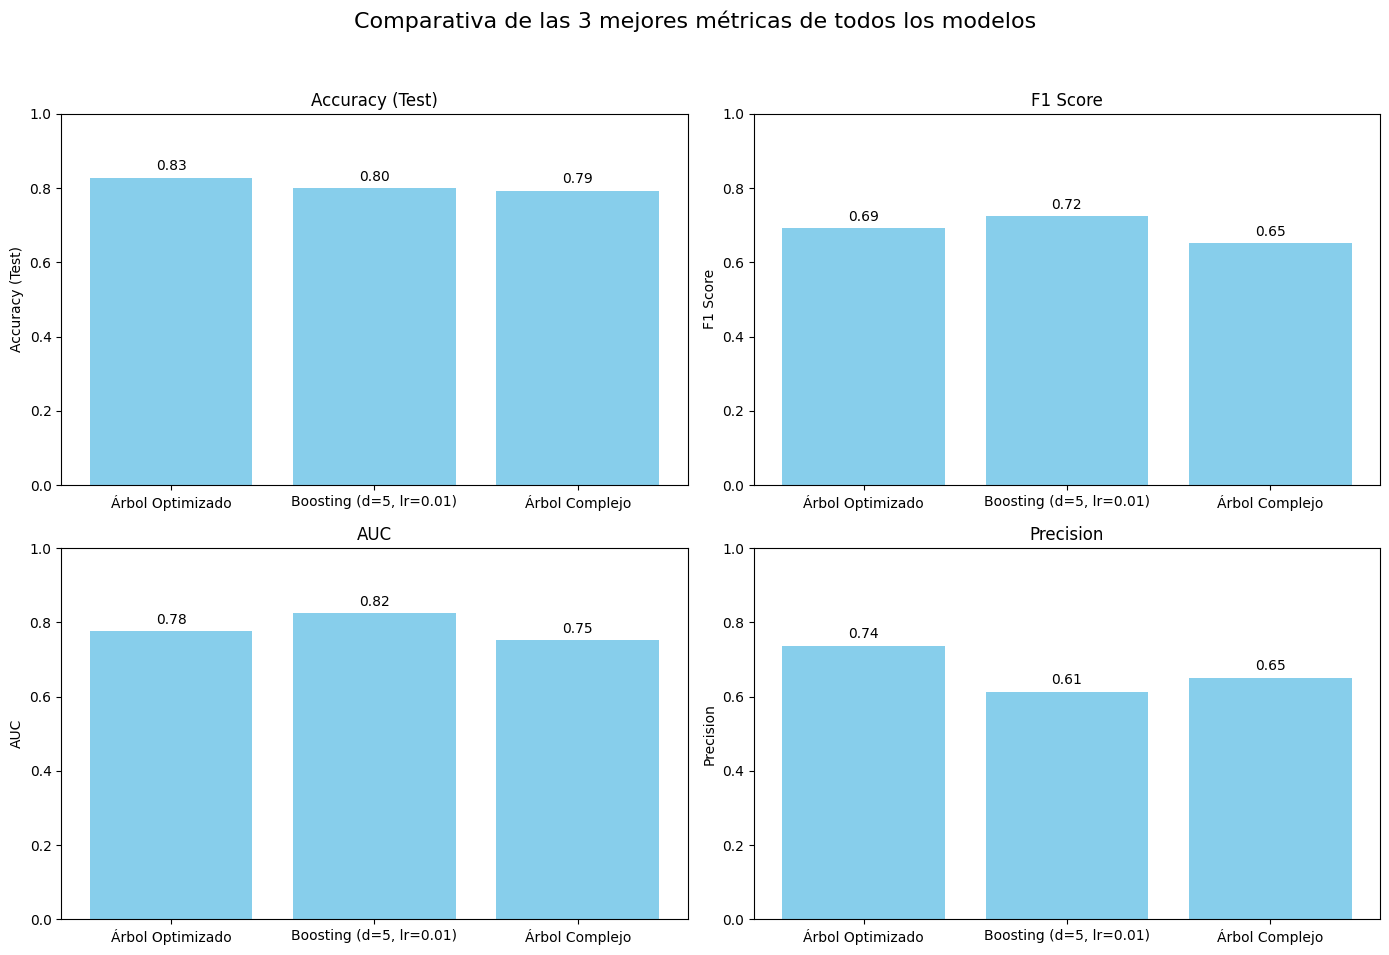

In [ ]:
#hacemos un subplot de los 3 mejores resultados 
top4 = df_todos.sort_values(by='Accuracy (Test)', ascending=False).head(3)
metricas = ['Accuracy (Test)', 'F1 Score', 'AUC', 'Precision']
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()
for i, metrica in enumerate(metricas):
    axs[i].bar(top4.index, top4[metrica], color='skyblue')
    axs[i].set_title(metrica)
    axs[i].set_ylim(0, 1)
    axs[i].set_ylabel(metrica)
    for j, val in enumerate(top4[metrica]):
        axs[i].text(j, val + 0.02, f'{val:.2f}', ha='center', fontsize=10)
plt.suptitle('Comparativa de las 3 mejores métricas de todos los modelos', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

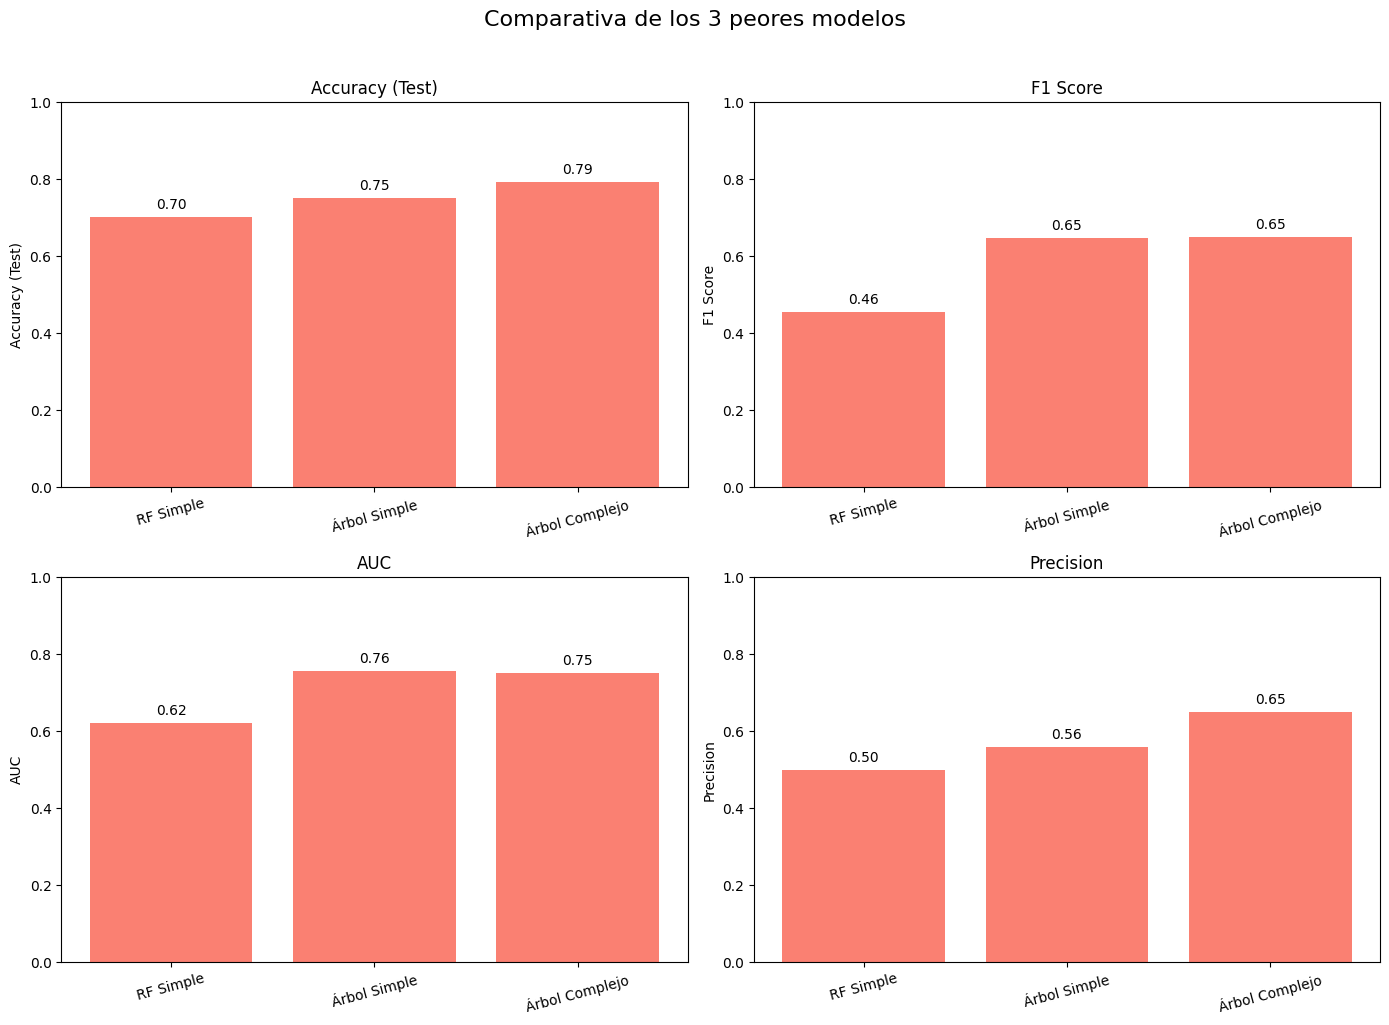

In [ ]:
#hacemos el plto de los 3 peores
bottom3 = df_todos.sort_values(by='Accuracy (Test)', ascending=True).head(3)
metricas = ['Accuracy (Test)', 'F1 Score', 'AUC', 'Precision']
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, metrica in enumerate(metricas):
    axs[i].bar(bottom3.index, bottom3[metrica], color='salmon')  # Usamos color rojo para destacar bajo rendimiento
    axs[i].set_title(metrica)
    axs[i].set_ylim(0, 1)
    axs[i].set_ylabel(metrica)
    # Rotamos los nombres de los modelos para mejor legibilidad
    axs[i].tick_params(axis='x', rotation=15)
    # Añadimos los valores encima de las barras
    for j, val in enumerate(bottom3[metrica]):
        axs[i].text(j, val + 0.02, f'{val:.2f}', ha='center', fontsize=10)

plt.suptitle('Comparativa de los 3 peores modelos', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

fINALMENTE, NOS QUEDAMOS CO NEL MODELO BOOSTING PORQUE EQUILIBRA RECALL Y F1, QUE SON VARIABLES IMPORTANTES SI QUEREMOS MINIMIZAR LOS FALSOS NEGATIVOS.
EL ÁRBOL OPTIMIZADO TAMBIÉN ES UNA SEGUNDA BUENA OPCIÓN POR SUS MEJORES VALORES ES PRECISIÓN Y ESPECIFICIDAD PERO EL BOOSTING, ES MEJOR EN RECALL Y F1, ASÍ QUE ESTE NOS DA MÉTRICAS MÁS EQUILIBRADAS. 